In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data statistics
import scipy.stats as stats

# Disable python warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data/gemstone.csv')
# Top & Last 5 rows of data
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [3]:
# Drop unnecessary feature
df.drop(columns=['id'], axis= 1, inplace= True)

# I made a few strategies to deal with data.
### 1. Understanding Data
### 2. EDA
### 3. Data preprocessing
### 4. Model building, cross-validation, and evaluation
### 5. Model Testing

## 1. Understanding Data

In [4]:
# Check shape of data
df.shape

(193573, 10)

In [5]:
# Check columns types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [6]:
# Check missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
# Check duplicate values
df.duplicated().sum()

0

In [8]:
# Numerical Columns Descriptive
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [9]:
# Numerical and Categorical Descriptive statistics how does data look mathematically
df.describe(include= 'all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573,193573,193573,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,92454,44391,53272,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.790688,NaN,NaN,NaN,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,NaN,NaN,NaN,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,NaN,NaN,NaN,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,NaN,NaN,NaN,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,NaN,NaN,NaN,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000


In [10]:
# Numerical columns
num = [col for col in df.columns if (df[col].dtypes == 'int64') or (df[col].dtypes == 'float64')]
num.pop() # Drop last dependent column
print(f"List of numerical columns: \n {num}")
print(f'Length of numerical columns: {len(num)}')

List of numerical columns: 
 ['carat', 'depth', 'table', 'x', 'y', 'z']
Length of numerical columns: 6


In [11]:
# Categorical columns
cat = [col for col in df.columns if (df[col].dtypes == 'object')]
print(f"List of categorical columns: \n {cat}")
print(f'Length of categorical columns: {len(cat)}')

List of categorical columns: 
 ['cut', 'color', 'clarity']
Length of categorical columns: 3


## 2. EDA

### i. Univariant Analysis On Numerical Data 

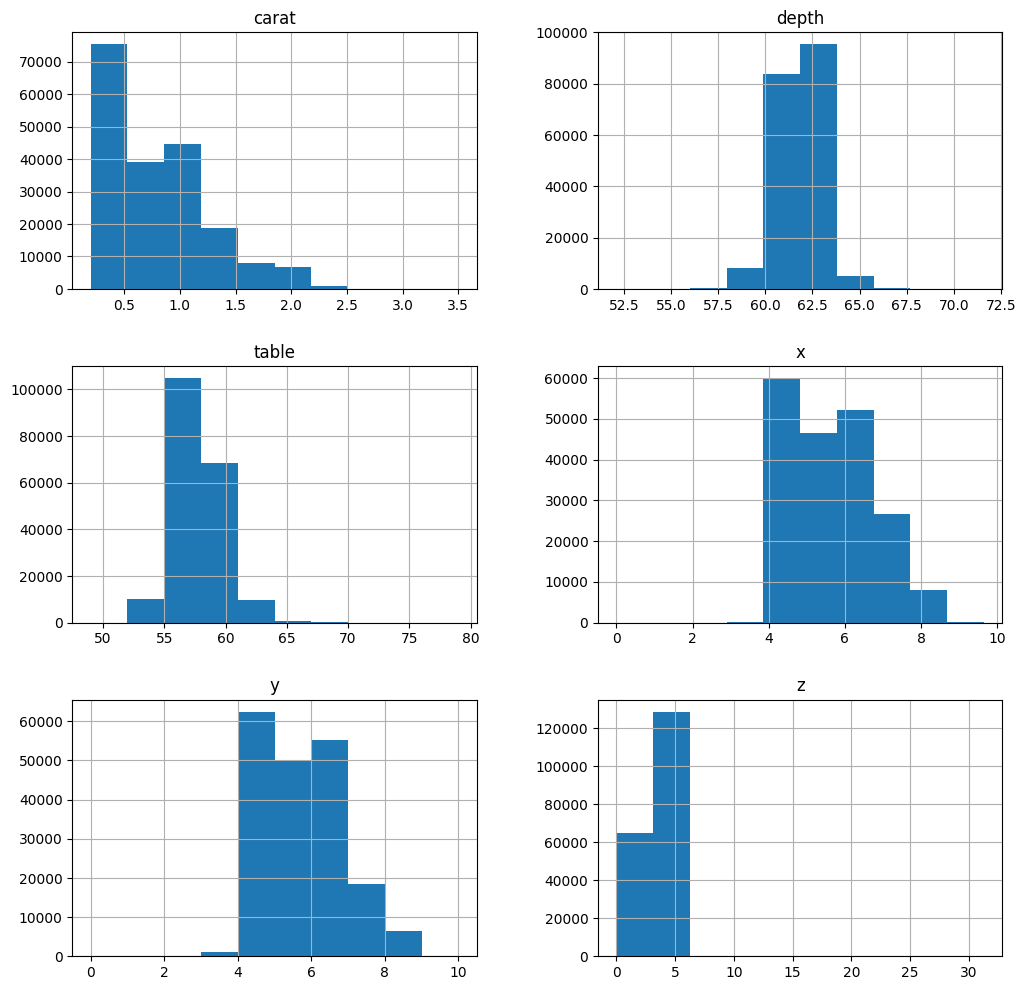

In [12]:
# Graph histogram on numerical data
df[num].hist(figsize= (12, 12))
plt.show()

In [13]:
# Check data skewness on numerical data
df[num].skew()

carat    0.995135
depth   -0.276382
table    0.619062
x        0.361050
y        0.356758
z        0.685671
dtype: float64

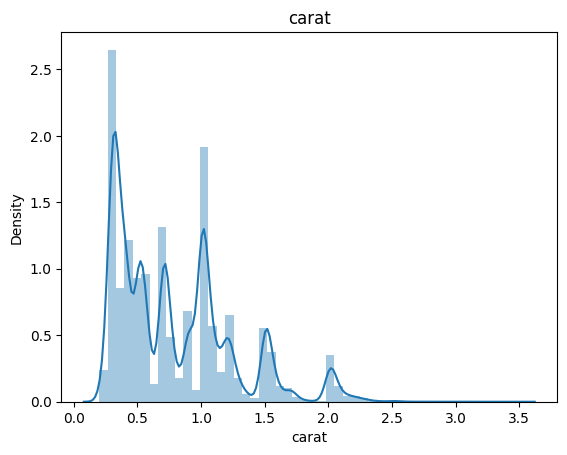

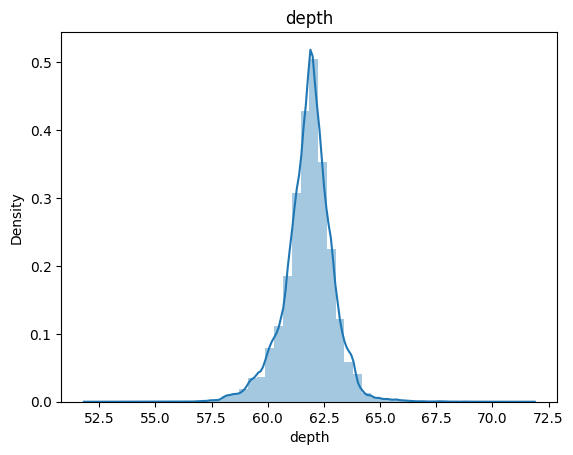

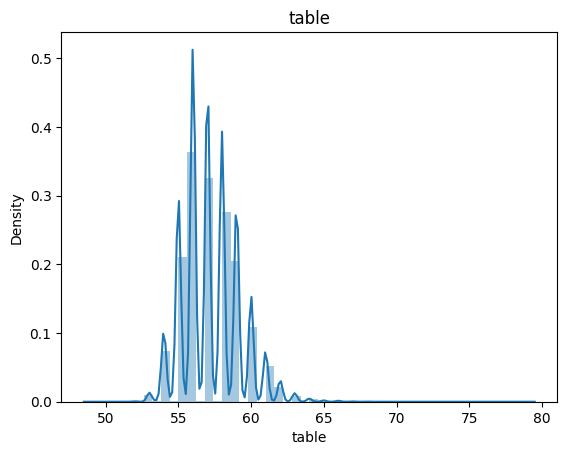

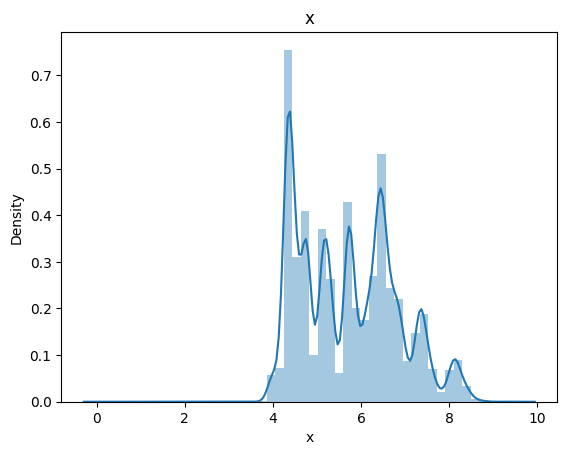

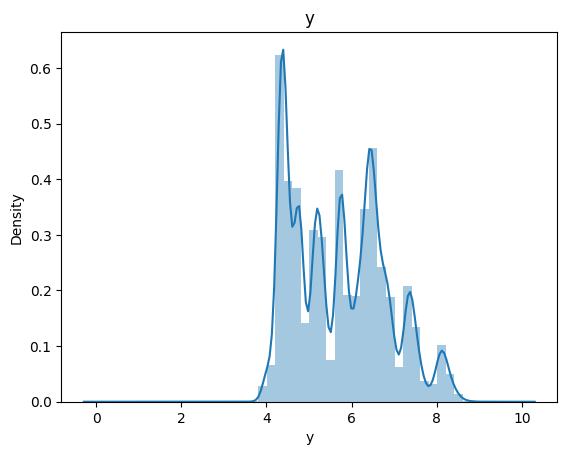

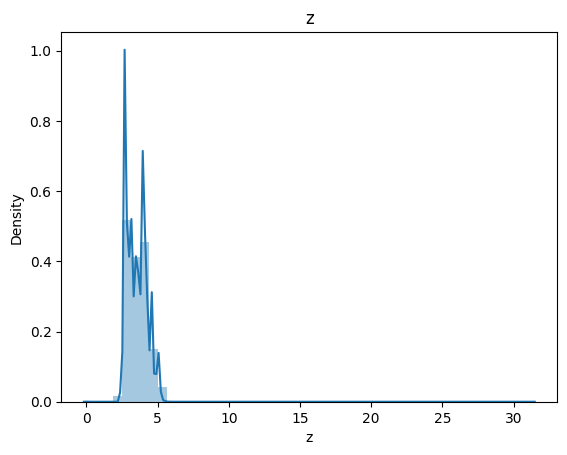

In [14]:
# Graph distplot on numerical data
for i in num:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

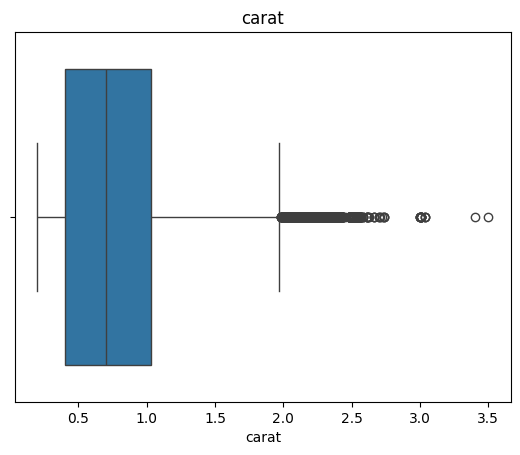

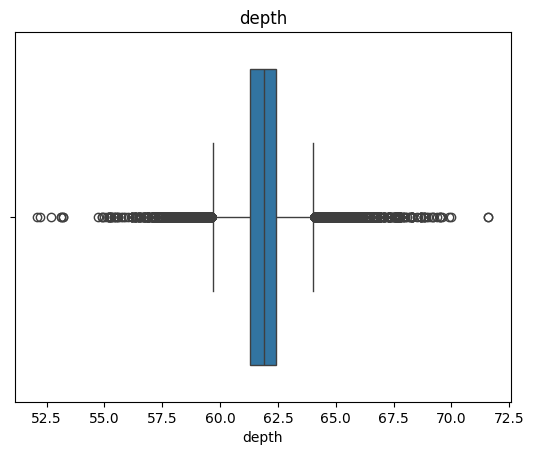

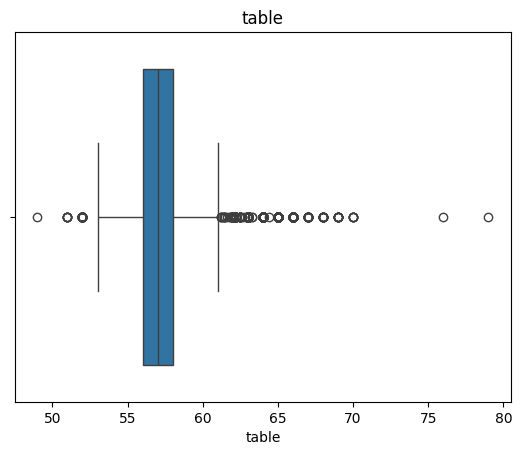

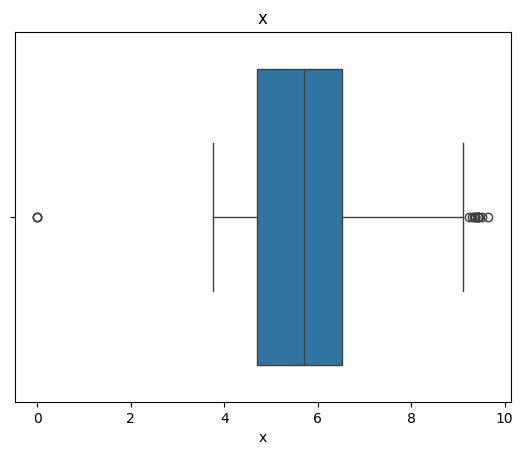

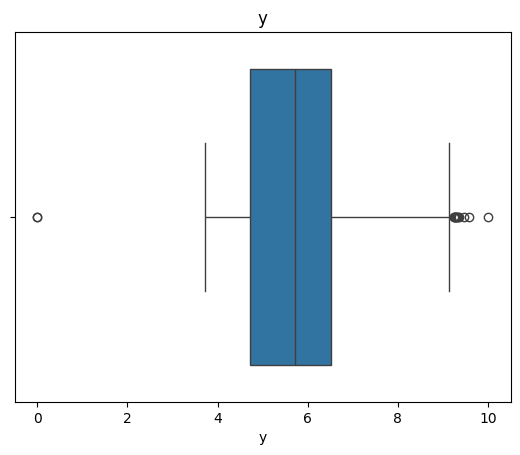

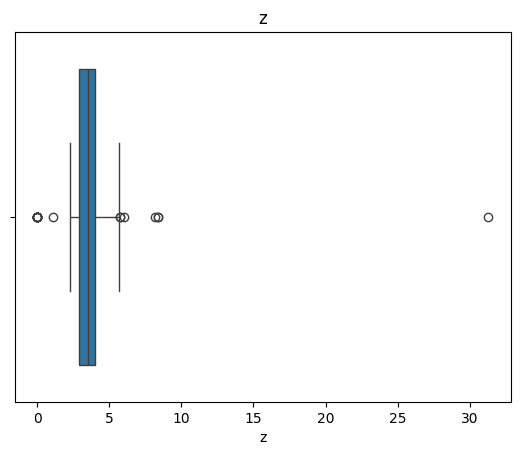

In [15]:
# Graph boxplot on numerical data
for i in num:
    sns.boxplot(x= df[i])
    plt.title(i)
    plt.show()

### ii. Bivariant & Multivariant Analysis On Numerical-To-Numerical Columns

In [16]:
num

['carat', 'depth', 'table', 'x', 'y', 'z']

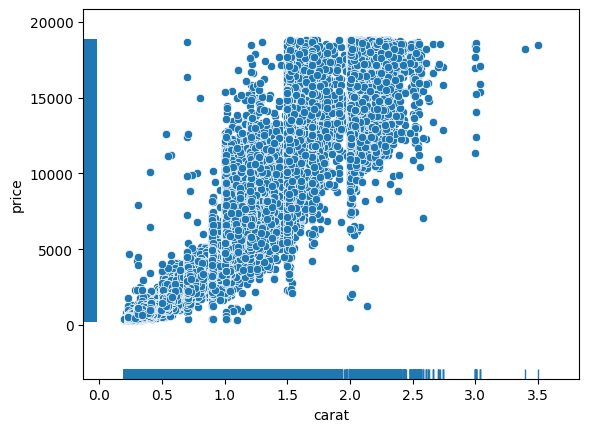

In [17]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship b/w 'carat' and 'price'
sns.scatterplot(data= df, x='carat', y='price')
sns.rugplot(data= df, x='carat', y='price')
plt.show()

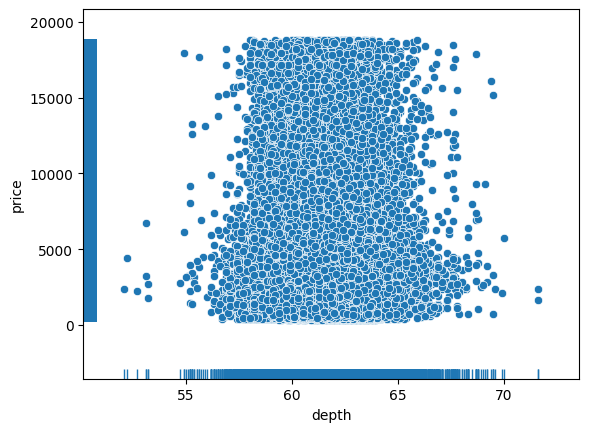

In [18]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship b/w 'depth' and 'price'
sns.scatterplot(data= df, x='depth', y='price')
sns.rugplot(data= df, x='depth', y='price')
plt.show()

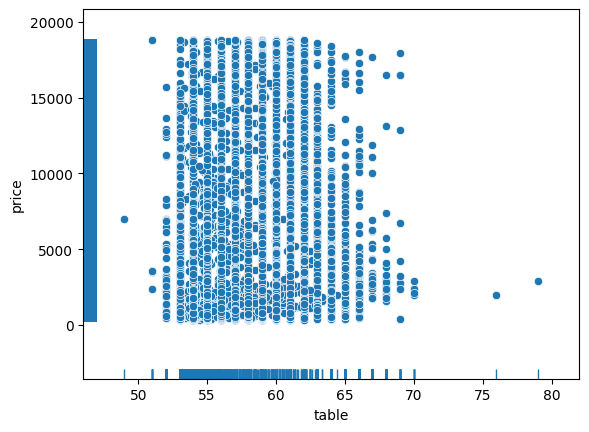

In [19]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship b/w 'table' and 'price'
sns.scatterplot(data= df, x='table', y='price')
sns.rugplot(data= df, x='table', y='price')
plt.show()

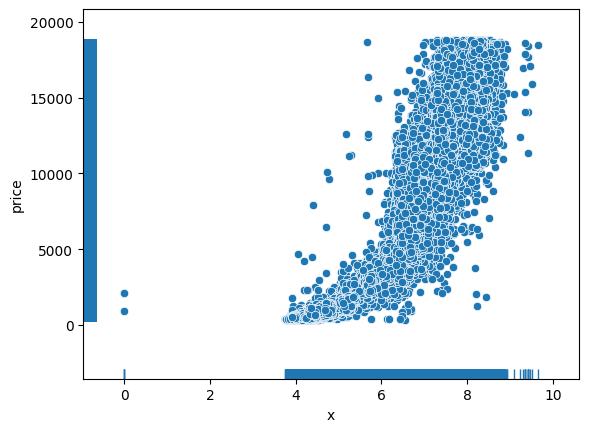

In [20]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship b/w 'x' and 'price'
sns.scatterplot(data= df, x='x', y='price')
sns.rugplot(data= df, x='x', y='price')
plt.show()

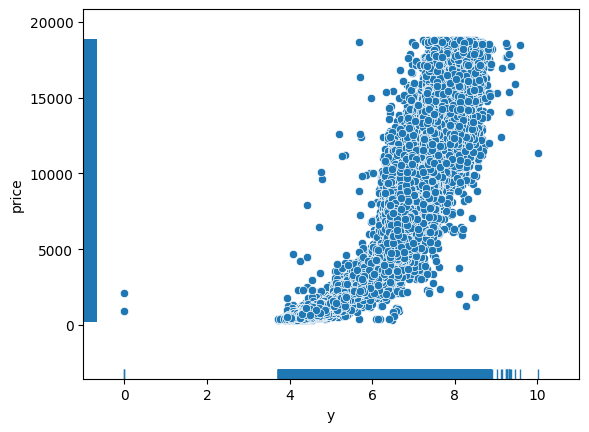

In [21]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship b/w 'y' and 'price'
sns.scatterplot(data= df, x='y', y='price')
sns.rugplot(data= df, x='y', y='price')
plt.show()

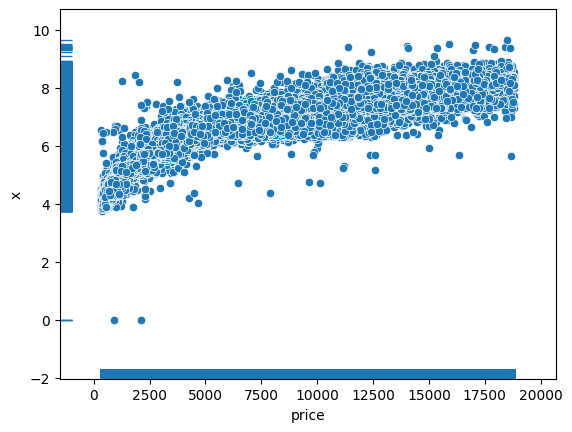

In [22]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship b/w 'z' and 'price'
sns.scatterplot(data= df, x='price', y='x')
sns.rugplot(data= df, x='price', y='x')
plt.show()

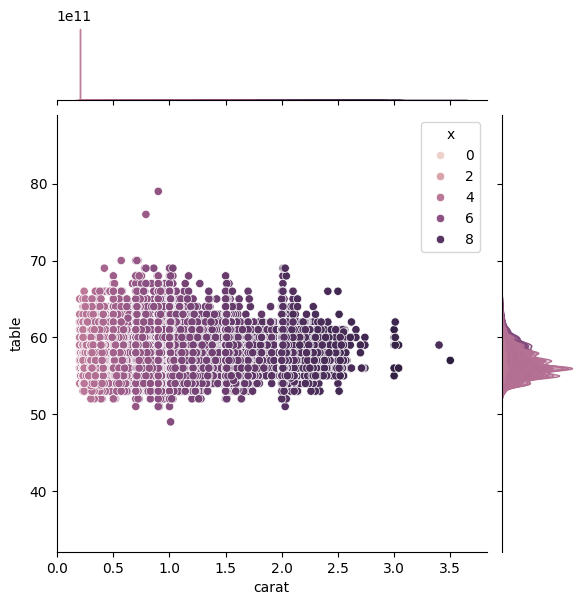

In [23]:
# Graph Joinplot of numerical-to-numerical data and see the relationship b/w 'carat', 'table', and 'x'
sns.jointplot(data= df, x= 'carat', y='table', hue= 'x')
plt.show()

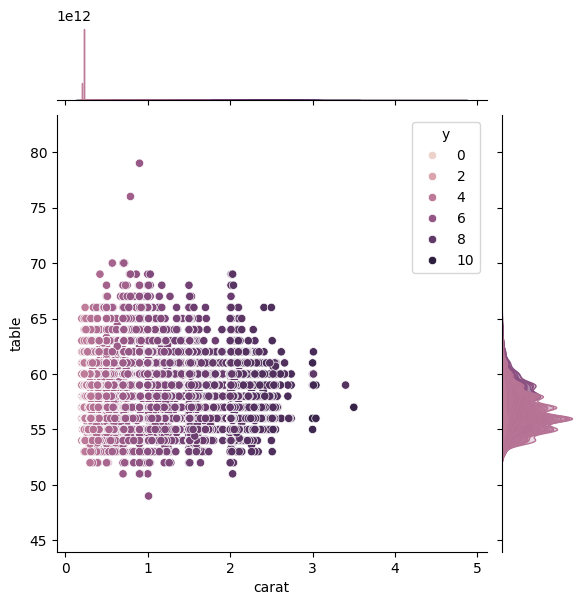

In [24]:
# Graph Joinplot of numerical-to-numerical data and see the relationship b/w 'carat', 'table', and 'y'
sns.jointplot(data= df, x= 'carat', y='table', hue= 'y')
plt.show()

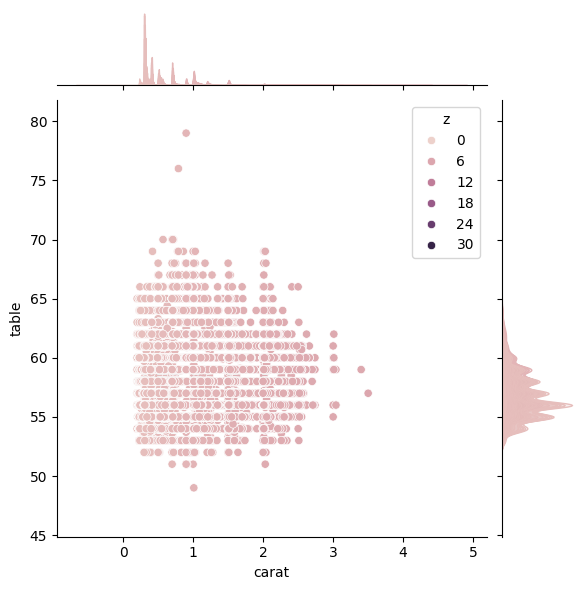

In [25]:
# Graph Joinplot of numerical-to-numerical data and see the relationship b/w 'carat', 'table', and 'z'
sns.jointplot(data= df, x= 'carat', y='table', hue= 'z')
plt.show()

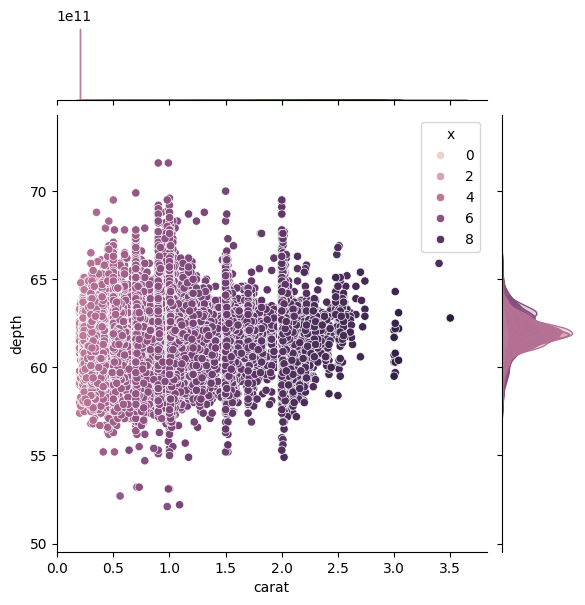

In [26]:
# Graph Joinplot of numerical-to-numerical data and see the relationship b/w 'carat', 'depth', and 'x'
sns.jointplot(data= df, x= 'carat', y='depth', hue= 'x')
plt.show()

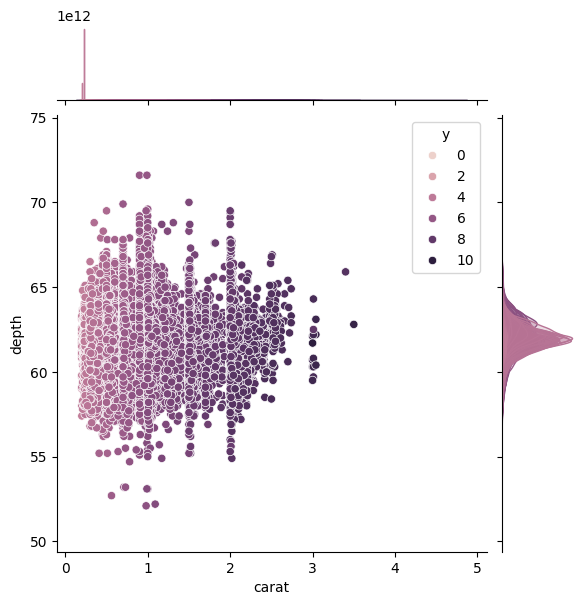

In [27]:
# Graph Joinplot of numerical-to-numerical data and see the relationship b/w 'carat', 'depth', and 'y'
sns.jointplot(data= df, x= 'carat', y='depth', hue= 'y')
plt.show()

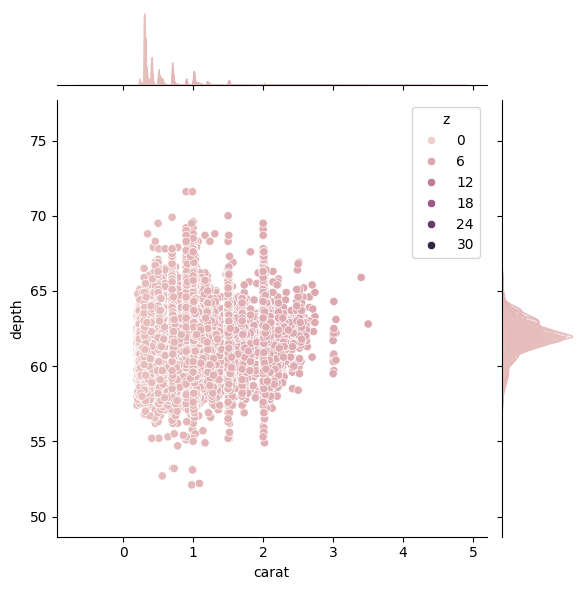

In [28]:
# Graph Joinplot of numerical-to-numerical data and see the relationship b/w 'carat', 'depth', and 'z'
sns.jointplot(data= df, x= 'carat', y='depth', hue= 'z')
plt.show()

### i. Univariant Analysis On Categorical Data 

In [29]:
cat

['cut', 'color', 'clarity']

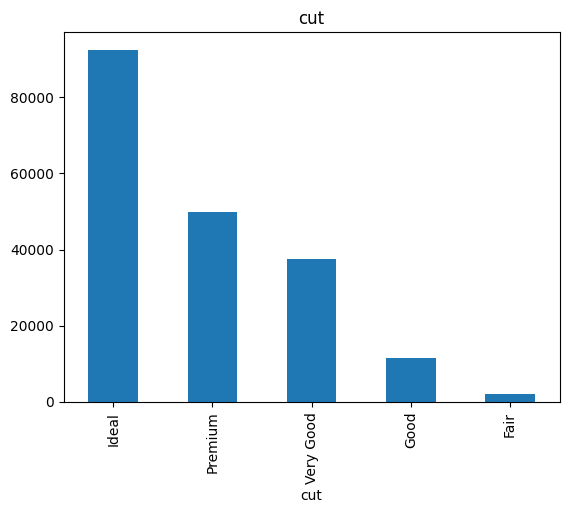

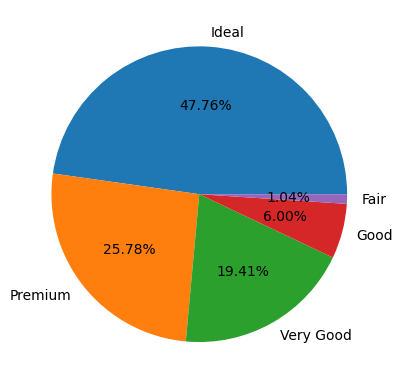

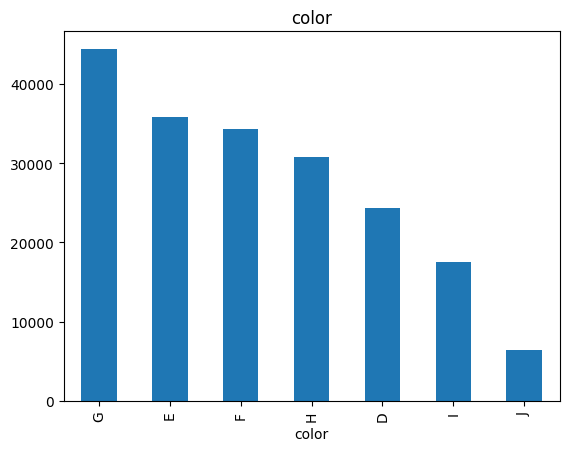

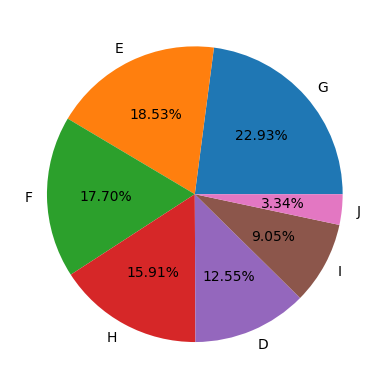

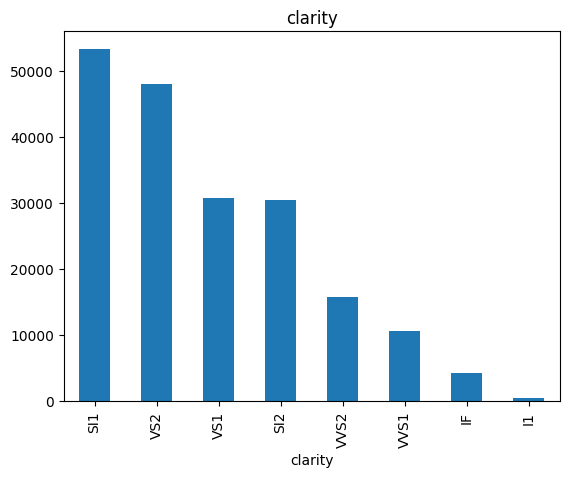

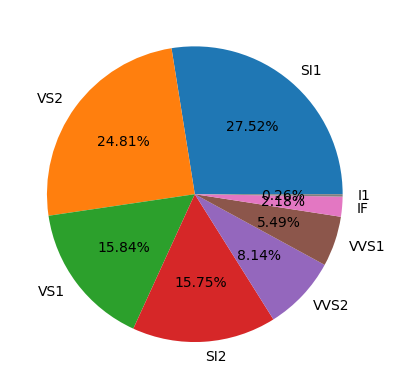

In [30]:
# Graph barplot of on cat cols
for i in cat:
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()
    # Graph pie chart
    lab = df[i].value_counts().index
    plt.pie(df[i].value_counts(), labels= lab, autopct='%.2f%%')
    plt.show()

### ii. Bivariant & Multivariant Analysis On Numerical-To-Categorical Data

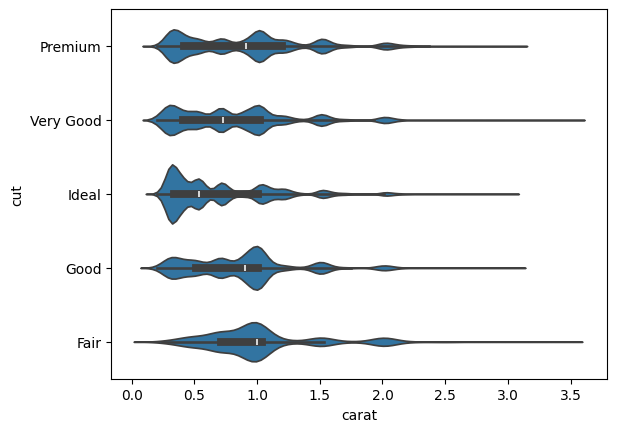

In [31]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'cut' and 'carat'
sns.violinplot(data= df, x='carat', y='cut')
plt.show()

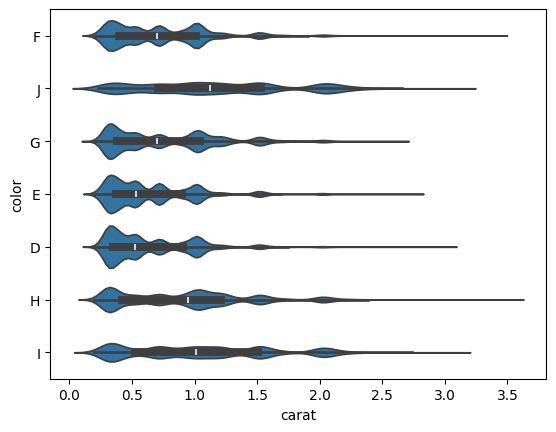

In [32]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'color' and 'carat'
sns.violinplot(data= df, x='carat', y='color')
plt.show()

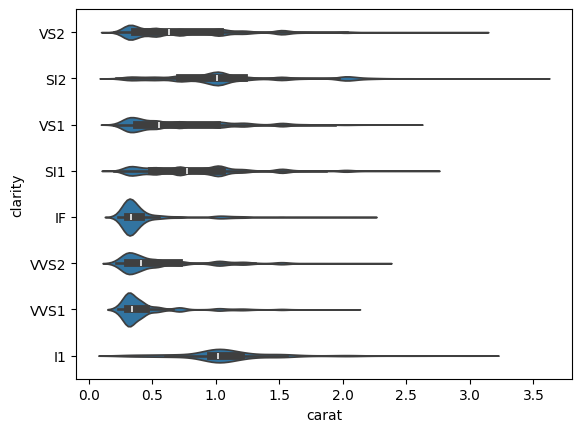

In [33]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'clarity' and 'carat'
sns.violinplot(data= df, x='carat', y='clarity')
plt.show()

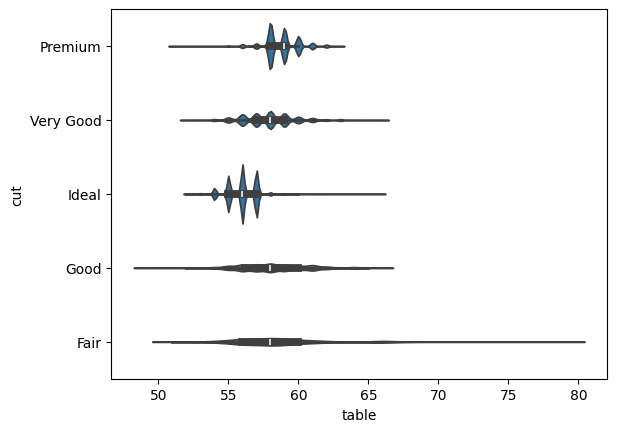

In [34]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'table' and 'cut'
sns.violinplot(data= df, x='table', y='cut')
plt.show()

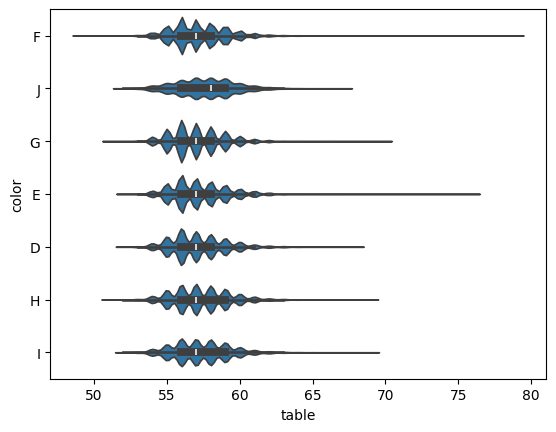

In [35]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'table' and 'color'
sns.violinplot(data= df, x='table', y='color')
plt.show()

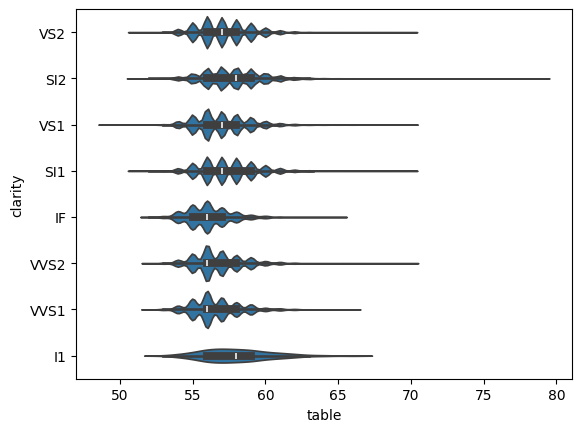

In [36]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'table' and 'clarity'
sns.violinplot(data= df, x='table', y='clarity')
plt.show()

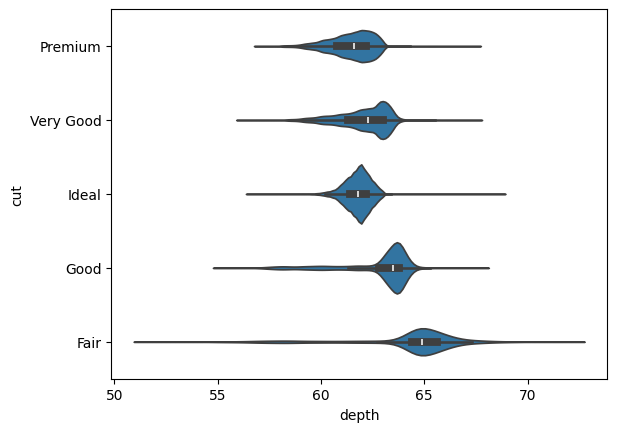

In [37]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'depth' and 'cut'
sns.violinplot(data= df, x='depth', y='cut')
plt.show()

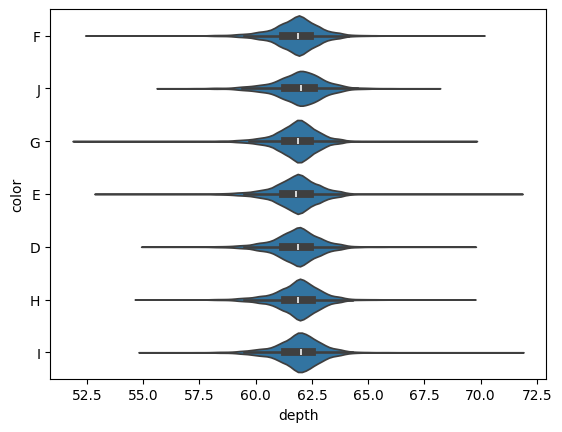

In [38]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'depth' and 'color'
sns.violinplot(data= df, x='depth', y='color')
plt.show()

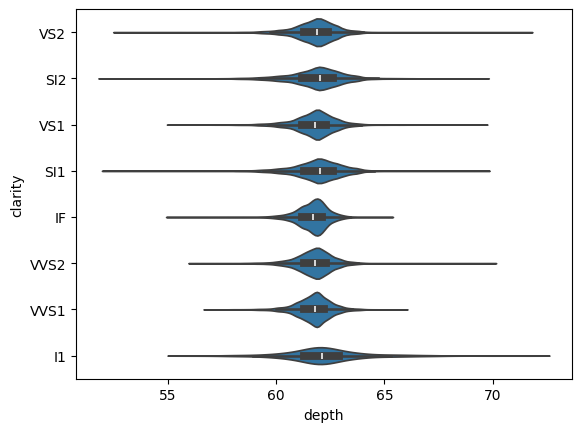

In [39]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'depth' and 'clarity'
sns.violinplot(data= df, x='depth', y='clarity')
plt.show()

## 3. Data Preprocessing

In [40]:
# Convert categorical data into numerical form using onehotencoding technique
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(dtype='int64')
ordinal.set_output(transform='pandas')

OrdinalEncoder(dtype='int64')

In [41]:
# Convert categorical columns into numerical form
diamond_df = ordinal.fit_transform(df[cat])

In [42]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [43]:
# Drop ['cut', 'color', 'clarity'] columns
df.drop(columns= ['cut', 'color', 'clarity'], axis=1, inplace=True)

In [44]:
# Concatenate all cols
df = pd.concat([df, diamond_df], axis=1)

In [45]:
# Display all columns
pd.set_option('display.max_columns', None)
# Display top & last 5 rows of columns
df

,carat,depth,table,x,y,z,price,cut,color,clarity
0,1.52,62.2,58.0,7.27,7.33,4.55,13619,3,2,5
1,2.03,62.0,58.0,8.06,8.12,5.05,13387,4,6,3
2,0.70,61.2,57.0,5.69,5.73,3.50,2772,2,3,4
3,0.32,61.6,56.0,4.38,4.41,2.71,666,2,3,4
4,1.70,62.6,59.0,7.65,7.61,4.77,14453,3,3,5
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130,2,0,7
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874,3,3,7
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036,4,2,2
193571,0.34,62.9,55.0,4.45,4.49,2.81,681,4,0,2


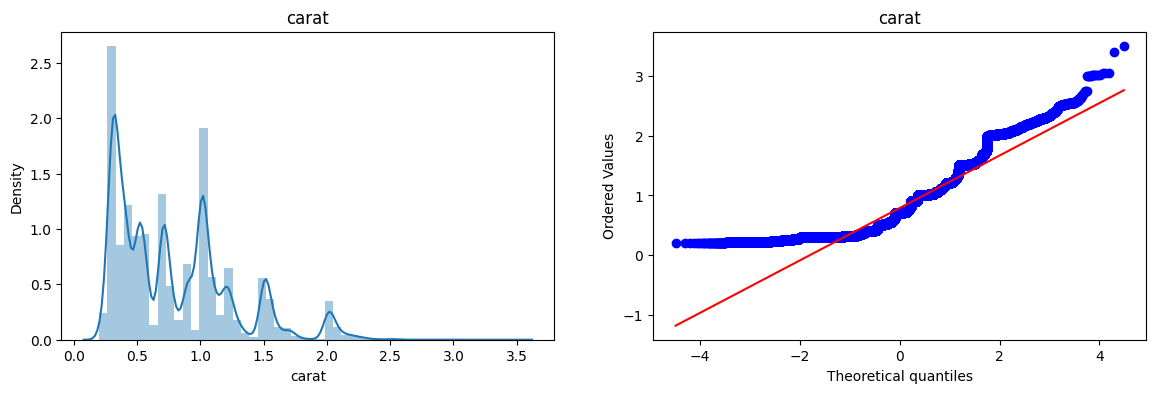

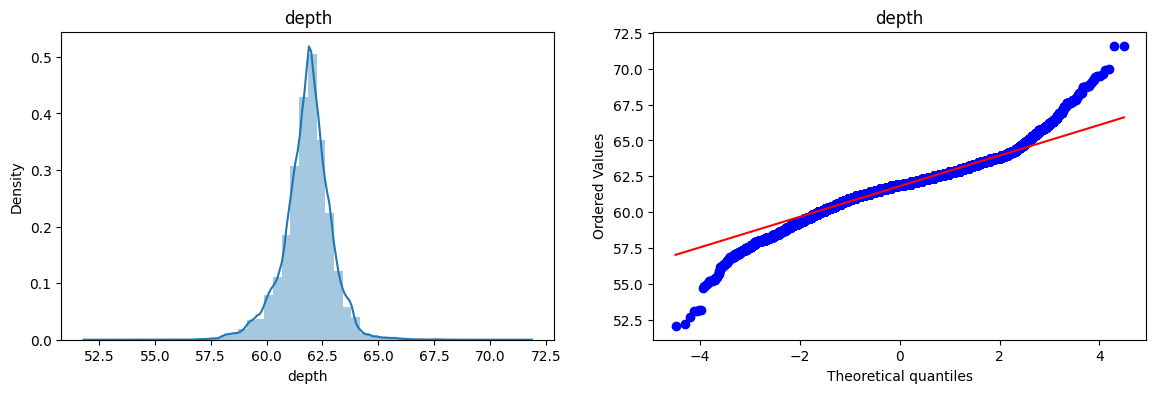

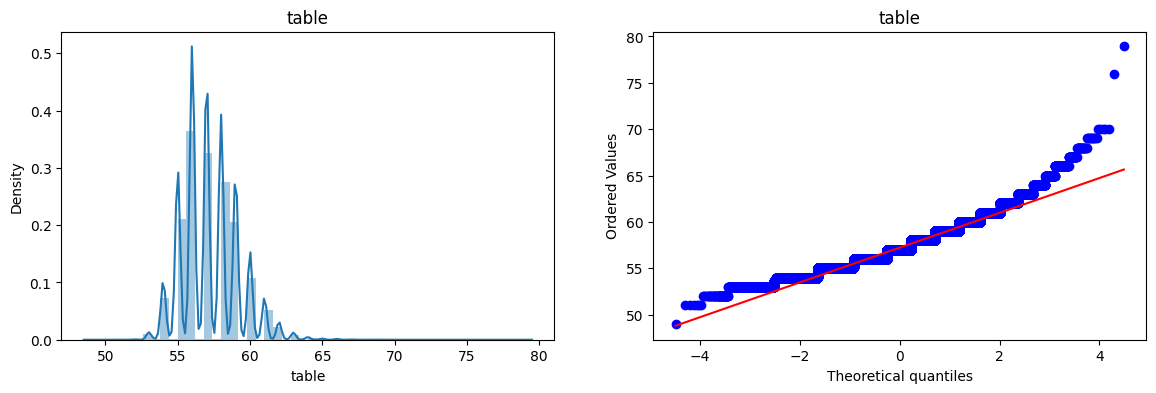

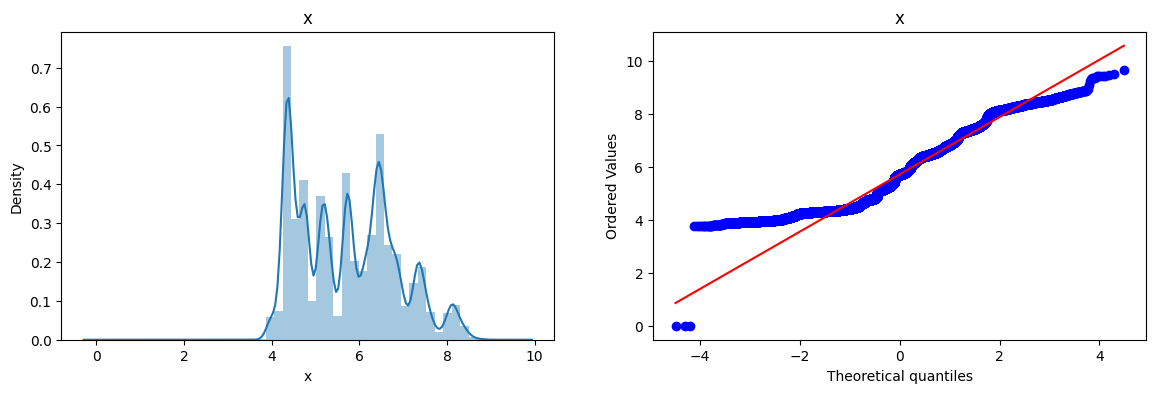

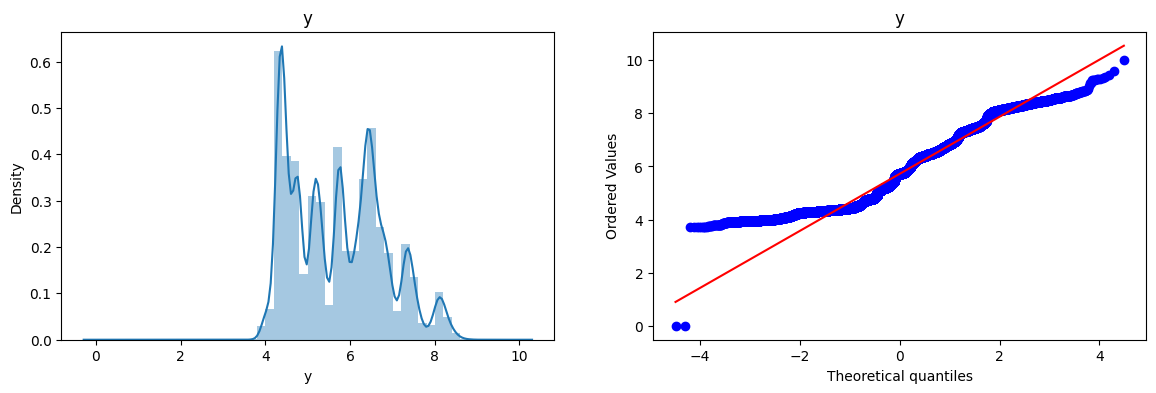

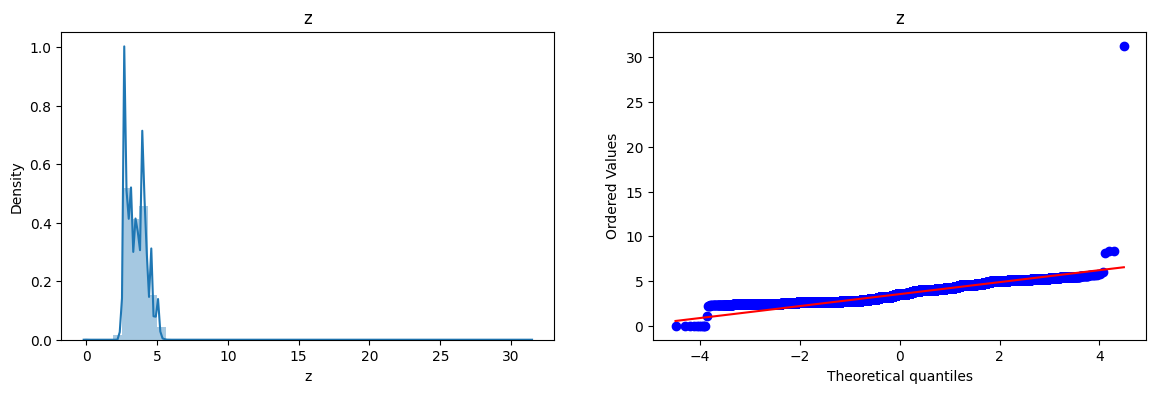

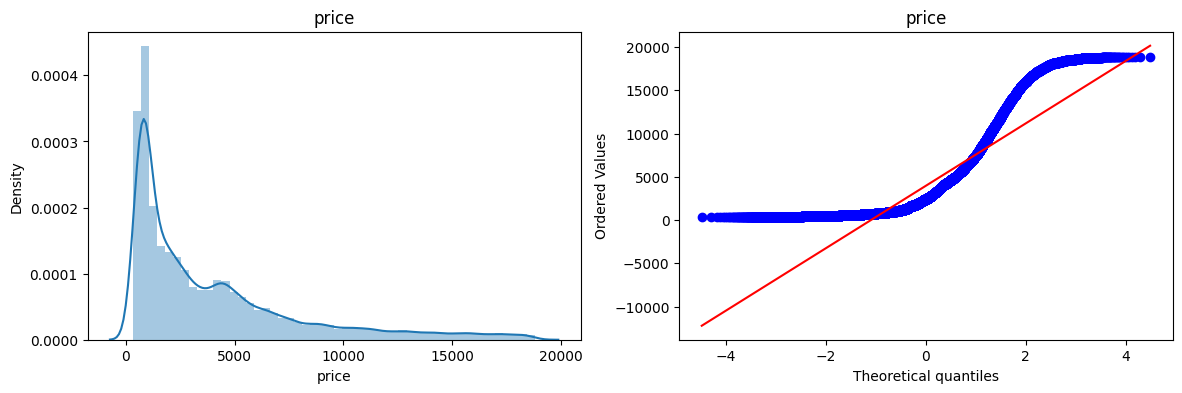

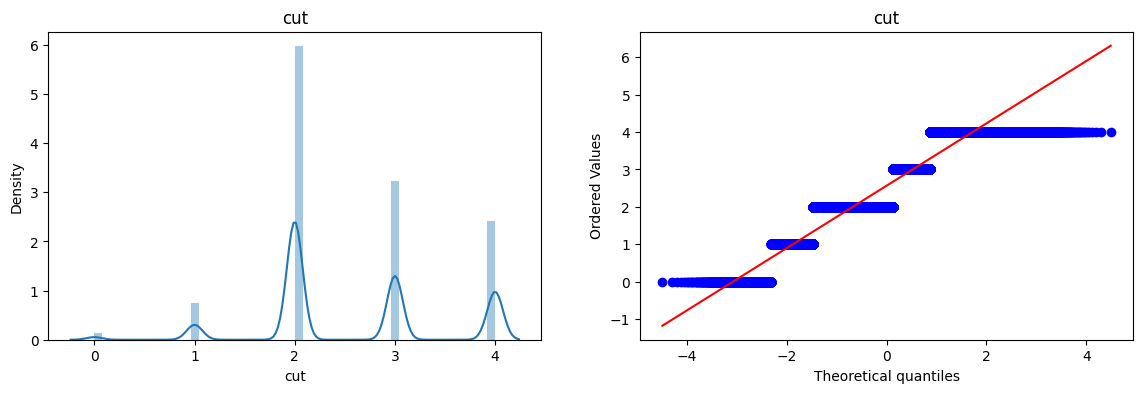

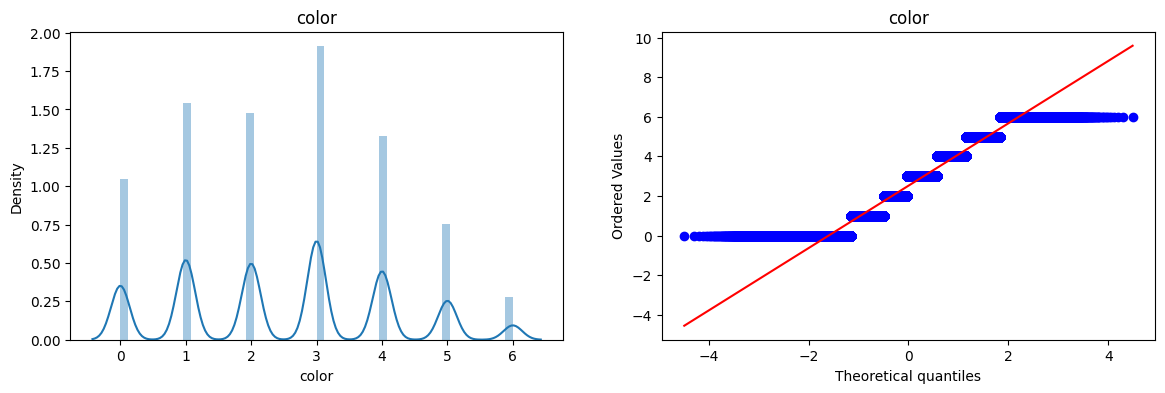

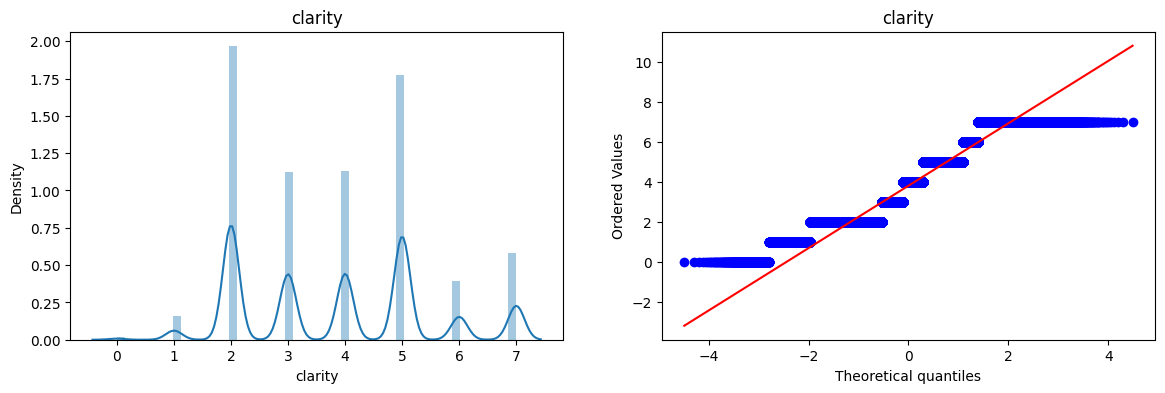

In [46]:
# Plotting the distplots without any transformation
for col in df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [47]:
# Split data into featue X and y for feature selection
X = df.drop(columns=['price'], axis=1)
y = df[['price']]

In [48]:
X.shape

(193573, 9)

In [49]:
# Apply power transform featurewise to make data more Gaussian-like.
# Transform features using quantiles information.
from sklearn.preprocessing import PowerTransformer
qwt = PowerTransformer(method='box-cox')
qwt.set_output(transform='pandas')

PowerTransformer(method='box-cox')

In [50]:
# Transform independent features
x_qwt = qwt.fit_transform(X+0.00000001)

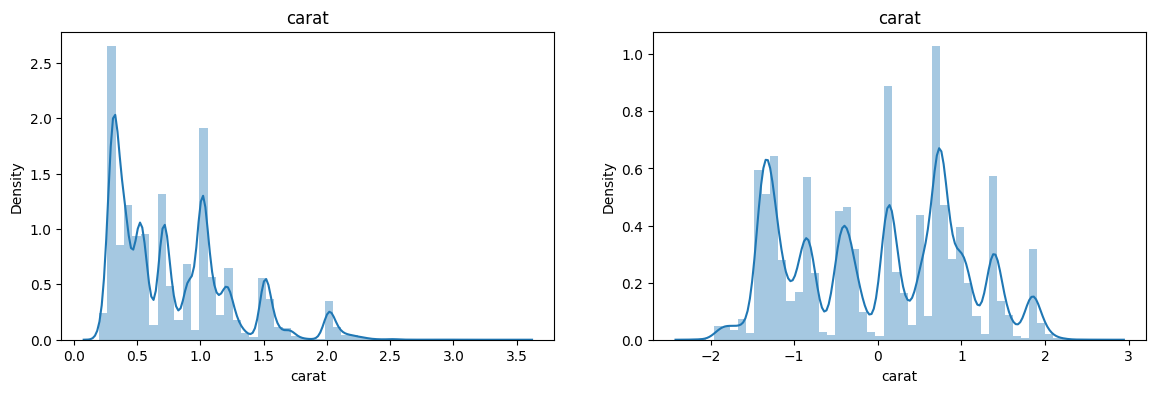

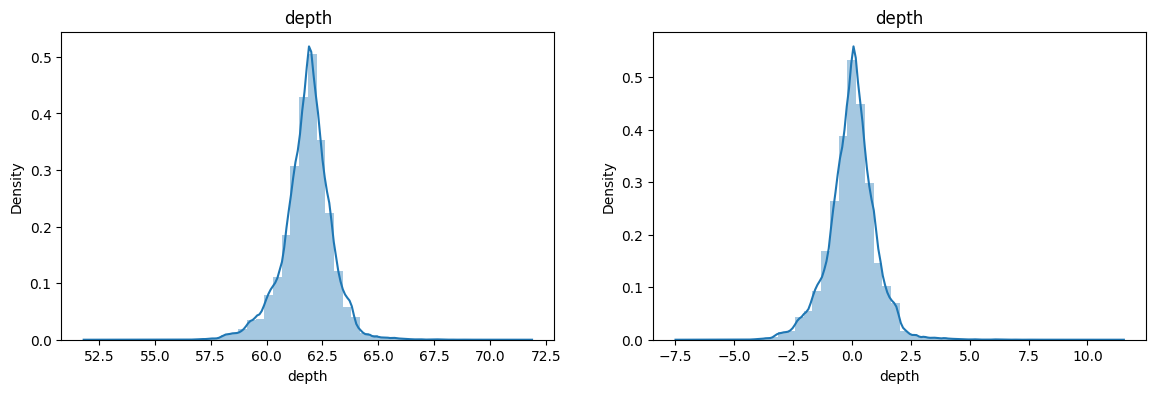

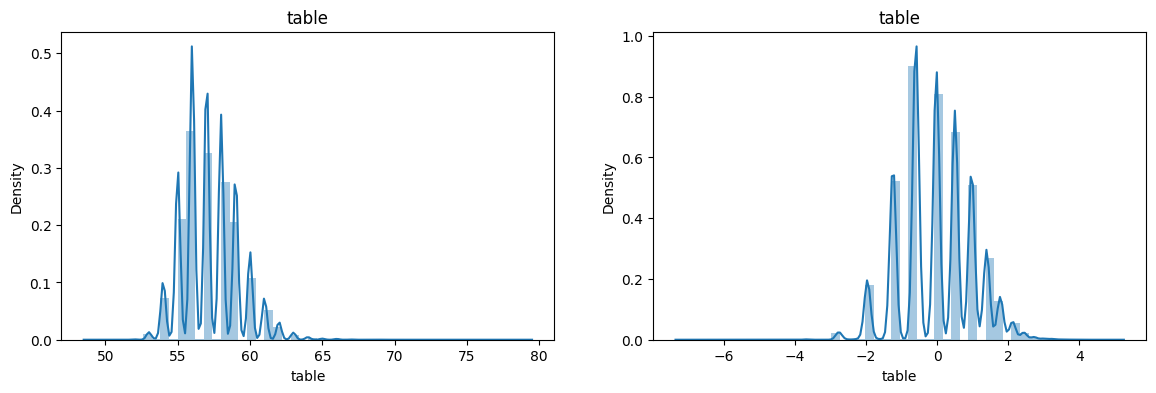

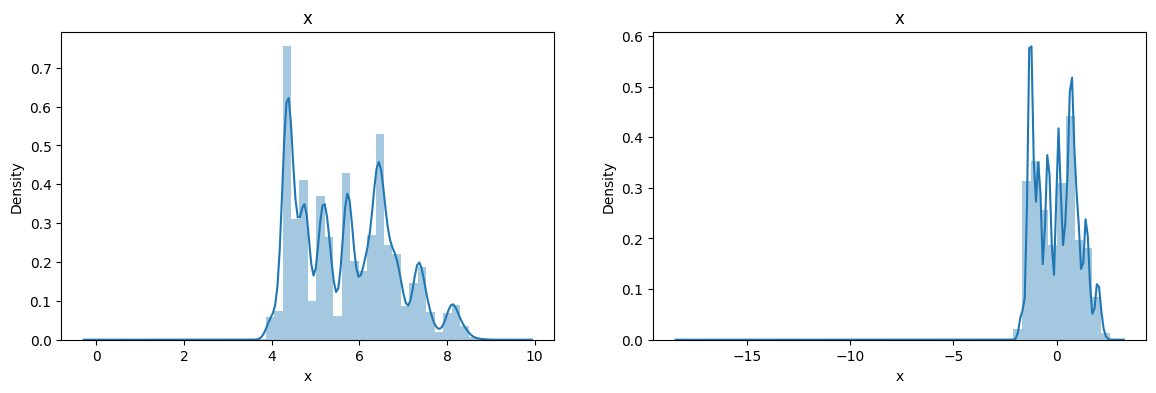

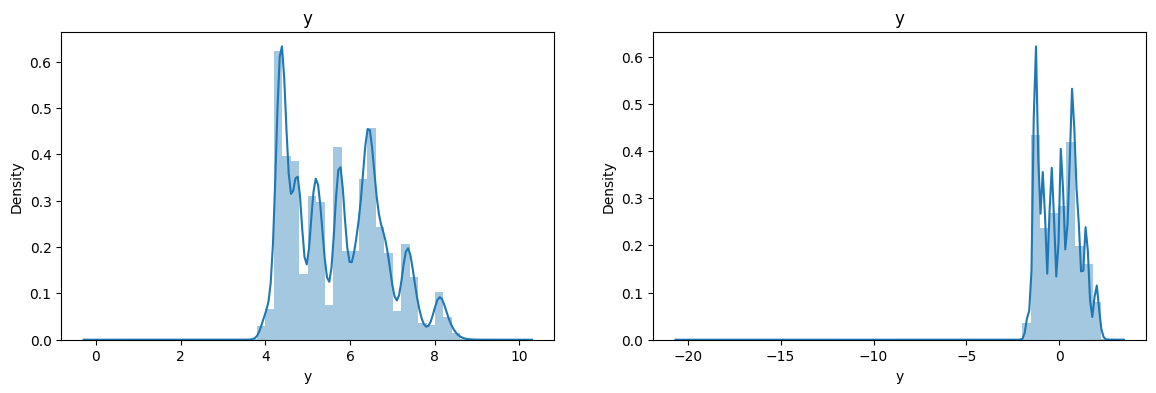

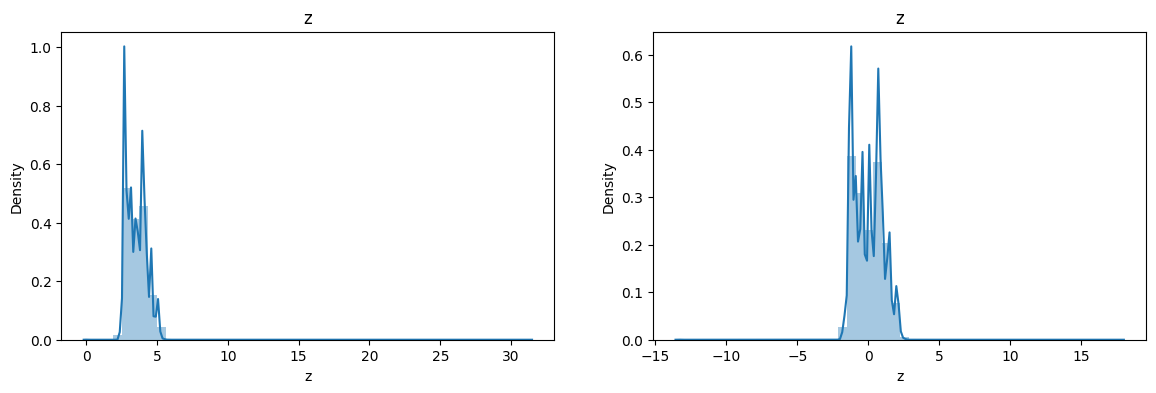

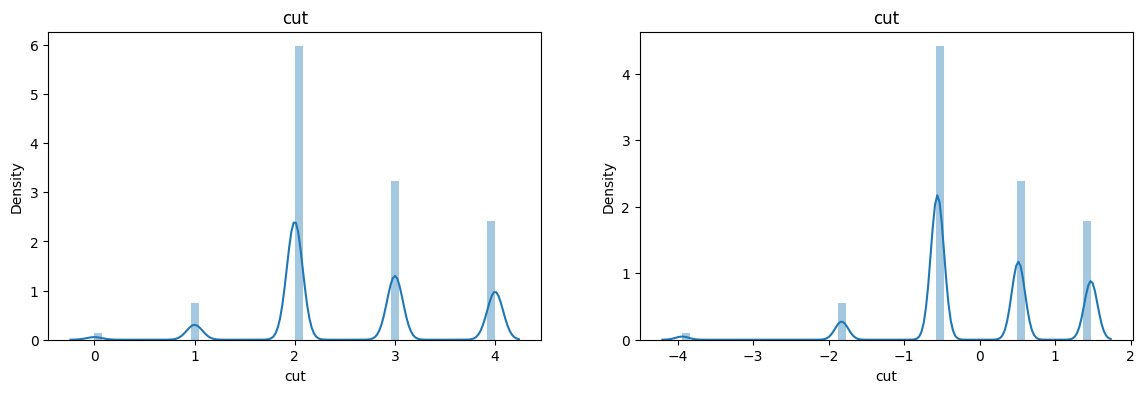

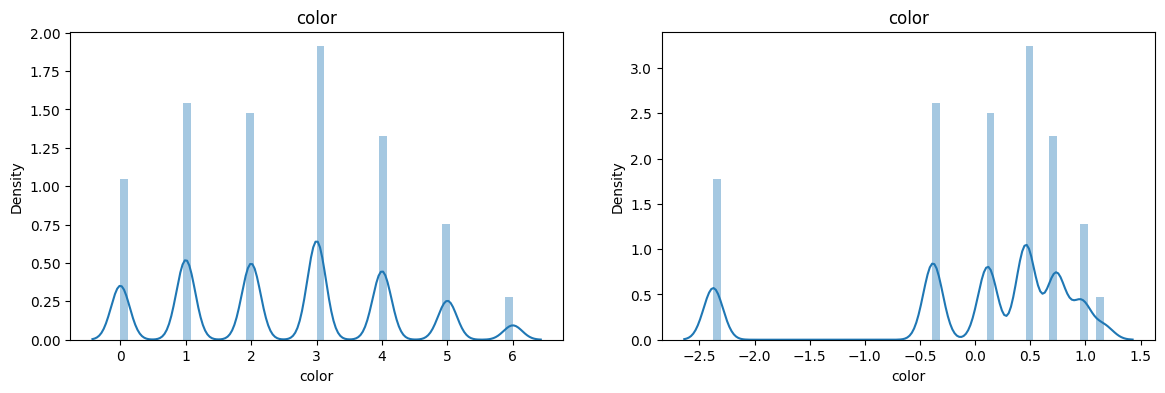

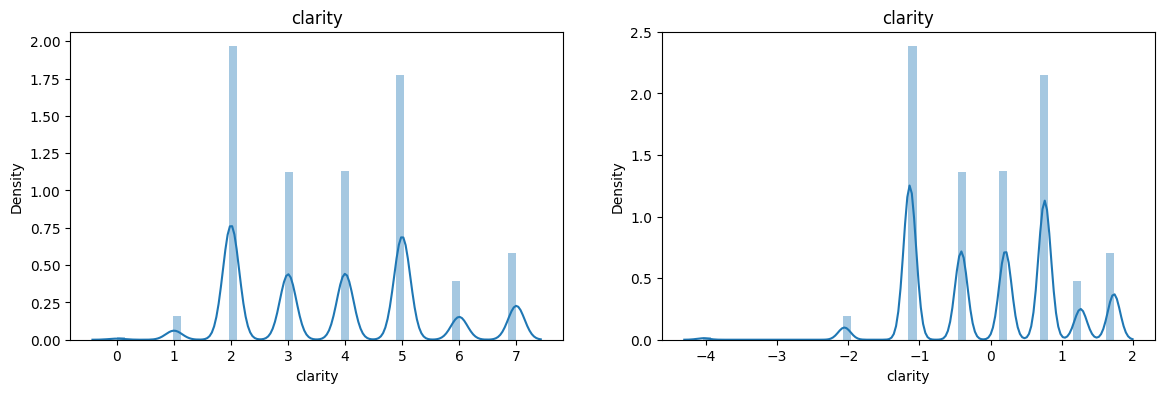

In [51]:
# Before and after comparision
for col in x_qwt.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_qwt[col])
    plt.title(col)

    plt.show()

In [52]:
# For Feature selection (FS) using varianceThreshold & mutual_info_reg technique
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression

In [53]:
x_qwt.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,1.387510,0.330511,0.497538,1.358785,1.406932,1.430246,0.512201,0.114433,0.761379
1,1.846454,0.142488,0.497538,1.938996,1.982977,2.036088,1.472380,1.165108,-0.411611
2,0.101934,-0.592651,-0.022762,0.046426,0.080706,0.009332,-0.558950,0.459960,0.208416
3,-1.282343,-0.228452,-0.601092,-1.258196,-1.241532,-1.244229,-0.558950,0.459960,0.208416
4,1.566345,0.711713,0.966486,1.643239,1.616177,1.701609,0.512201,0.459960,0.761379


In [54]:
# Find zero variance features of x_qwt
vt = VarianceThreshold(threshold= 0.95)
vt.fit_transform(x_qwt)

array([[ 1.38750953,  0.33051122,  0.49753829, ...,  0.51220078,
         0.11443294,  0.76137914],
       [ 1.84645416,  0.1424884 ,  0.49753829, ...,  1.47238033,
         1.16510809, -0.41161061],
       [ 0.10193422, -0.59265095, -0.02276199, ..., -0.55895   ,
         0.45996012,  0.20841618],
       ...,
       [ 0.1736427 ,  1.19798586, -0.02276199, ...,  1.47238033,
         0.11443294, -1.13505211],
       [-1.17189676,  1.00216489, -1.24513931, ...,  1.47238033,
        -2.37403662, -1.13505211],
       [ 0.12620082, -0.95018909,  2.72060785, ..., -1.8275769 ,
        -0.38170083, -0.41161061]])

In [55]:
# Column names you gave
vt.feature_names_in_

array(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color',
       'clarity'], dtype=object)

In [56]:
# Column names you get
vt.get_feature_names_out()

array(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color',
       'clarity'], dtype=object)

In [57]:
# Variance values
vt.variances_

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
# Columns 
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [59]:
mi = mutual_info_regression(x_qwt, y)

In [60]:
imp = pd.Series(mi, x_qwt.columns[0:len(x_qwt.columns)])

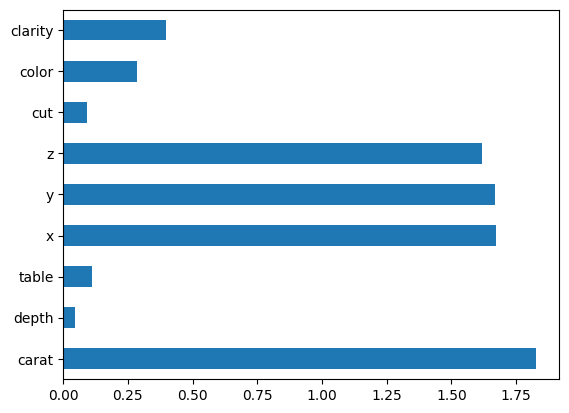

In [61]:
imp.plot(kind='barh')
plt.show()

In [62]:
# Correlation between the features
df.corr()['price'].sort_values(ascending=False)*100

price      100.000000
carat       94.339610
y           90.103323
x           90.100439
z           89.303704
color       21.085915
table       17.491538
cut          7.095348
depth        0.187951
clarity     -9.214871
Name: price, dtype: float64

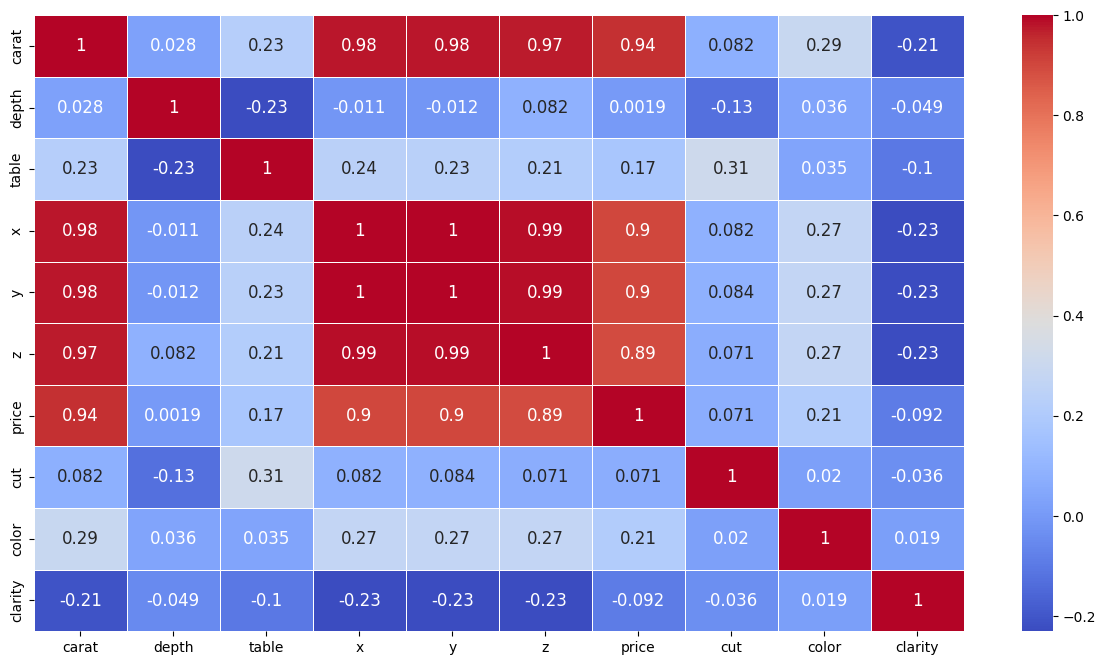

In [63]:
# Graph heatmap of correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, annot_kws={'size': 12}, linewidths= .7)
plt.show()

## 4. Model Building, Cross-Validation, and Evaluation

In [64]:
# Split arrays or matrices into random train and test subsets.
# Evaluate a score by cross-validation.
# Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Regressor model
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [65]:
# Split data into train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_qwt, y, test_size=0.2, random_state=42)

In [66]:
# Call Different Regression Models
elastinet = ElasticNet()
decisiontreeregressor = DecisionTreeRegressor()
extratreesregressor = ExtraTreesRegressor()
baggingregressor = BaggingRegressor()
adaboostregressor = AdaBoostRegressor()
gradientboostingregressor = GradientBoostingRegressor()
xgbregressor = XGBRegressor()
catboostregressor = CatBoostRegressor(verbose=False, metric_period=100)
randomforestregressor = RandomForestRegressor()
kneighborsregressor = KNeighborsRegressor()

In [67]:
# Store Regression models into list
models = [elastinet, decisiontreeregressor, extratreesregressor, baggingregressor, adaboostregressor, gradientboostingregressor, xgbregressor, catboostregressor, randomforestregressor, kneighborsregressor]

In [69]:
# Check the cross_val_score on all the models
def cross_src(model,X_trn,y_trn):
    src = np.round(cross_val_score(model, X_trn, y_trn, cv=5),2)
    msrc = np.round(np.mean(src),2)
    return src, msrc

In [70]:
# Testing with cross_val_score
result = []
mean_src = []

for model in models:
    cur_rst,cur_msrc = cross_src(model, X_train, y_train)
    print('Model Name: ',model)
    print('\n')
    print('Result :', cur_rst)
    print('Mean_Score :', cur_msrc)
    print('\n')
    
    result.append(cur_rst)
    mean_src.append(cur_msrc)

Model Name:  ElasticNet()


Result : [0.77 0.76 0.77 0.76 0.77]
Mean_Score : 0.77


Model Name:  DecisionTreeRegressor()


Result : [0.96 0.96 0.96 0.96 0.96]
Mean_Score : 0.96


Model Name:  ExtraTreesRegressor()


Result : [0.98 0.98 0.98 0.98 0.98]
Mean_Score : 0.98


Model Name:  BaggingRegressor()


Result : [0.97 0.98 0.98 0.97 0.97]
Mean_Score : 0.97


Model Name:  AdaBoostRegressor()


Result : [0.9  0.93 0.9  0.89 0.85]
Mean_Score : 0.89


Model Name:  GradientBoostingRegressor()


Result : [0.97 0.97 0.98 0.97 0.97]
Mean_Score : 0.97


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_ca

In [68]:
# Perform GridSearchCV with cross-validation to find the best hyperparameter
params = {
    'elasticnet': {
        'alpha': [0.3, 0.6, 0.8, 1.0],
        'l1_ratio': [0.3, 0.6, 0.8, 1.0],
        'selection': ['cyclic', 'random'],
    },
    'decisiontreeregressor': {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter':['best','random'],
        'max_features':['sqrt','log2', 'auto'],
        # 'max_depth': [4, 6, 8, 10, 12],
        # 'min_samples_split': [2, 3, 4, 5, 6],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
    },
    'extratreesregressor': {
        'n_estimator': [20, 35, 50, 75, 100],
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        # 'max_depth': [4, 6, 8, 10, 12],
        # 'min_samples_split': [2, 3, 4, 5, 6],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],

    },
    'baggingregressor': {
        'estimator': ['DecisionTreeRegressor, "RandomForestRegressor'],
        'n_estimators': [10, 15, 25, 35, 40],
        # 'max_samples':[1, 2, 3, 4, 5],
        # 'max_features': [1, 2, 3, 4, 5],
    },
    'adaboostregressor': {
        'learning_rate':[.1, .01, 0.5, .001, 1.0],
        'loss':['linear','square','exponential'],
        'n_estimators': [8, 16, 32, 50, 75]
    },
    'gradientboostingregressor': {
        'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate':[.1,.01,.05,.001],
        # 'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
        # 'criterion':['squared_error', 'friedman_mse'],
        'max_features':['auto','sqrt','log2'],
        'n_estimators': [8, 16, 32, 50, 64, 100]
    },
    'xgbregressor': {
        'learning_rate':[.1, .01, .05, .001, 1.0],
        'n_estimators': [8, 16, 32, 50, 64, 100]
    },
    'catboostregressor': {
        'depth': [6,8,10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [30, 50, 80, 100]
    },
    'randomforestregressor': {
        'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'max_features':['sqrt','log2',None],
        'n_estimators': [8,16,32,64,128,256]
    },
    'kneighborsregressor': {
        'n_neighbors': [5, 15, 15, 20, 30],
        'weights':['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    }
}

In [71]:
X_test.shape

(38715, 9)

In [72]:
# Check the train or test all loss/metrics the models 
def evaluate_model(true, prediction):
    mae = np.round(mean_absolute_error(true, prediction), 2)
    mape = np.round(mean_absolute_percentage_error(true, prediction), 2)
    r2 = np.round(r2_score(true, prediction), 2)
    ad_r2 = np.round(1-((1 - r2)*(38715 - 1) / (38715 - 23 - 1)), 2)
    
    return mae, mape, r2, ad_r2

In [73]:
# Train all models and get the traning loss/metrics evaluation
mae_src= []
mape_src= []
r2_src= []
adjt_r2 = []
train_src = []
test_src = []
results = []

for model in models:
    param = params[model.__class__.__name__.lower()]

    gs = GridSearchCV(model, param_grid=param, cv=3, verbose=1)
    gs.fit(X_train, y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train, y_train)

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model on test dataset
    trn_mae, trn_mape, trn_r2, trn_adj_r2 = evaluate_model(y_train, y_train_pred)
    cur_mae, cur_mape, cur_r2, cur_adj_r2 = evaluate_model(y_test, y_test_pred)
    
    print('Model performance on Test dataset')
    print('Model Name: ',model)
    print('\n')
    print('Mean_Absolute_Error :',cur_mae)
    print('Mean_Absolute_Precentage_Error :',cur_mape)
    print('R2_Score :',cur_r2)
    print('Adjusted_R2_Score :',cur_adj_r2)
    print('-'*30)
    print('\n')

    print('Model performance on Training dataset')
    print(f"Mean Absolute Error: {trn_mae}")
    print(f'Mean Absolute Precentage Error : {trn_mape}')
    print(f"R2 Score: {trn_r2}")
    print(f'Adjusted R2 Score : {trn_adj_r2}')
    print('-'*35)
    print('\n')

    mae_src.append(cur_mae)
    mape_src.append(cur_mape)
    r2_src.append(cur_r2)
    adjt_r2.append(cur_r2)
    
    results.append({
        'model': model.__class__.__name__,
        'y_actual': y_test,
        'y_pred': y_test_pred,
        'mae': cur_mae,
        'mape': cur_mape,
        'r2': cur_r2,
        'adj_r2': cur_adj_r2
    })
    
    print('\n *** Model Detail ***')
    train = np.round(model.score(X_train, y_train), 2)
    test = np.round(model.score(X_test, y_test), 2)
    print(f" Training Model score :\n {train}")
    print(f" Testing Model score :\n {test}")
    print('='*30)
    train_src.append(train)
    test_src.append(test)
    print('\n')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Model performance on Test dataset
Model Name:  ElasticNet(alpha=0.3, l1_ratio=0.8)


Mean_Absolute_Error : 1431.37
Mean_Absolute_Precentage_Error : 0.74
R2_Score : 0.78
Adjusted_R2_Score : 0.78
------------------------------


Model performance on Training dataset
Mean Absolute Error: 1432.62
Mean Absolute Precentage Error : 0.74
R2 Score: 0.78
Adjusted R2 Score : 0.78
-----------------------------------



 *** Model Detail ***
 Training Model score :
 0.78
 Testing Model score :
 0.78


Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


In [ ]:
# Plotting the metrics graph of MAE & MAPE
epochs = range(len(models))
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(epochs, mae_src, '-o', color='blue', label='MAE')
plt.plot(epochs, mape_src, '-o', color='green', label='MAPE')

ax.set_xticklabels(range(0,11,1), rotation = 90)
ax.set_xlabel(xlabel= models)
plt.grid(visible=True)
plt.show()

In [ ]:
# Plotting the metrics graph of R2 & Adjusted R2
epochs = range(len(models))
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(epochs, r2_src, '-o', color='red', label='R2')
plt.plot(epochs, adjt_r2, '-o', color='black', label='Adjusted R2')

ax.set_xticklabels(range(0,11,1), rotation = 90)
ax.set_xlabel(xlabel= models)
plt.grid(visible=True)
plt.show()

In [ ]:
# Plotting the metrics graph
epochs = range(1, len(models) +1 )
plt.figure(figsize=(10, 6))

plt.plot(epochs, mae_src, marker='o', linestyle='-', color='blue', label='MAE')
plt.plot(epochs, mape_src, marker='o', linestyle='-', color='green', label='MAPE')
plt.plot(epochs, r2_src, marker='o', linestyle='-', color='yellow', label='R2')
plt.plot(epochs, adjt_r2, marker='o', linestyle='-', color='purple', label='Adjusted R2')

plt.title('Comparison of Metrics over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metric Values')
plt.grid(visible=True)
plt.legend()
plt.show()

In [ ]:
# All models error scores are convert into dataframe
perform_df = pd.DataFrame({'Algorithm': models, 'MAE': mae_src, 'MAPE': mape_src, 'R2': r2_src, 'Adjusted R2': adjt_r2, 'Model Train Score': train_src, 'Model Test Score': test_src})

In [ ]:
perform_df

In [ ]:
# Plotting actual vs. predicted values for each model
plt.figure(figsize=(12, 8))

for result in results:
    plt.scatter(result['y_actual'], result['y_pred'], label=result['model'], alpha=0.7)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.title('Actual vs. Predicted Values for Different Models')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.show()

## 5. Model testing

In [ ]:
X.sample(5)

In [ ]:
x_qwt.loc[48344]

In [ ]:
y.loc[48344]

In [ ]:
df.loc[48344]

In [ ]:
# Users Input
user_input = np.array([-0.31502907, -1.12648501,  0.96648641, -0.33633091, -0.31278855, -0.42842502,  0.51220078,  0.11443294, -1.13505211]).reshape(1, -1)
user_input

In [ ]:
for model in models:
    # trf = qwt.transform(user_input)
    pred = model.predict(X)[0]

    print('Model Name: ',model)
    print('Predict price :', np.round(pred,2))
    print('\n')